# Using pandas get_dummies

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


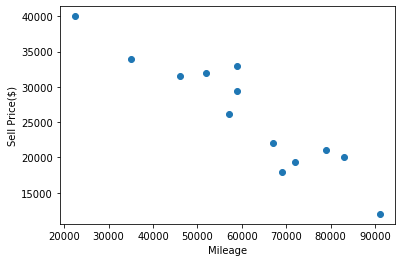

In [3]:
%matplotlib inline 
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")
plt.scatter(df[["Mileage"]], df[["Sell Price($)"]])

In [4]:
dummies = pd.get_dummies(df[["Car Model"]])
dummies

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [5]:
final_dummies = dummies.drop("Car Model_Mercedez Benz C class", axis = "columns")
final_df = df.drop("Car Model", axis = "columns")

In [6]:
data = pd.concat([final_df, final_dummies], axis = "columns")
data

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [27]:
X = data.drop("Sell Price($)", axis = "columns")
y = data[["Sell Price($)"]]

In [28]:
reg.fit(X,y)

LinearRegression()

In [33]:
reg.predict([[45000,4,0,0]])

/home/prekshya/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36991.31721061]])

In [34]:
reg.predict([[86000, 7, 0, 1]])

/home/prekshya/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[11080.74313219]])

In [35]:
reg.predict([[69000, 6,0,1]])

/home/prekshya/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[18705.2723644]])

In [38]:
reg.score(X,y)

0.9417050937281082

In [39]:
import pickle

In [41]:
with open('CarPrice_Prediction_Model', 'wb') as f:
    pickle.dump(reg, f)    

In [42]:
with open('CarPrice_Prediction_Model', 'rb') as f:
    mp = pickle.load(f)

In [43]:
mp.predict([[86000,7,0,1]])

/home/prekshya/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[11080.74313219]])

# Using Sklearn OneHotEncoder

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
df2 = pd.read_csv("carprices.csv")
df2

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [67]:
var = df2
var.loc[:,"Car Model"] = le.fit_transform(var.loc[:,"Car Model"])
var

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [70]:
X = var[["Car Model", "Mileage", "Age(yrs)"]].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [72]:
y = var[["Sell Price($)"]].values
y

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]])

In [76]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

In [74]:
reg.fit(X,y)

LinearRegression()

In [ ]:
reg.predict[]